# Tarea 1

Andrés Lueiza Colipi

## Pregunta 6

In [28]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import camb

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054


In [29]:
# Seteamos los parametros cosmologicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [30]:
# Obtenemos resultados

results = camb.get_results(pars)

In [64]:
# Obtenemos los parametros de densidad de materia, radiación, DE y urvatura

zs = np.linspace(0, 10, 1000)

omegam = results.get_Omega('cdm',zs) + results.get_Omega('baryon',zs) + results.get_Omega('nu',zs) #Cold dark matter + Bariones + Neutrinos masivos
omegar = results.get_Omega('photon',zs) +  results.get_Omega('neutrino',zs) # Neutrinos sin masa
omegak =  results.get_Omega('K',zs) # Curvatura
omegade =  results.get_Omega('de',zs) # Energía oscura


Text(0.5, 1.0, 'Evolución de los parametros de densidad')

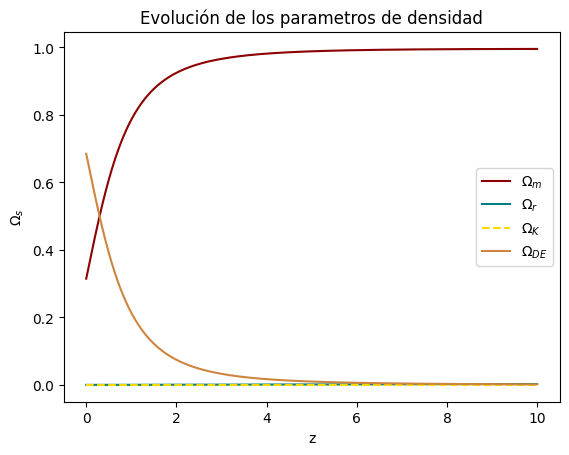

In [65]:
plt.plot(zs,omegam,label='$\Omega_m$',c='darkred')
plt.plot(zs,omegar,label='$\Omega_r$',c='teal')
plt.plot(zs,omegak,label='$\Omega_K$',c='gold',linestyle='dashed')
plt.plot(zs,omegade,label='$\Omega_{DE}$',c='peru')
plt.legend()
plt.xlabel('z')
plt.ylabel('$\Omega_s$')
plt.title('Evolución de los parametros de densidad')

## Pregunta 7


In [53]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

H0 = 67.4  # km/s/Mpc
omegar0 = 8.24 * 10**(-5)
zl = 1000
zs = np.linspace(0, 10, zl)
c = 3 * 10**5
w = -1

def hubble(z, w, omegam0, omegal0):
    omegam0 = np.asarray(omegam0)
    omegal0 = np.asarray(omegal0)
    z = np.asarray(z)

    omegak0 = 1 - omegam0[:, None] - omegal0[None, :] - omegar0
    H = H0 * np.sqrt(omegar0 * (1 + z[:, None, None])**4 + 
                     omegam0[None, :, None] * (1 + z[:, None, None])**3 + 
                     omegal0[None, None, :] * (1 + z[:, None, None])**(3 * (1 + w)) + 
                     omegak0[None, :, :] * (1 + z[:, None, None])**2)
    return H

def f_k(z, w, omegam0, omegal0):
    e = hubble(z, w, omegam0, omegal0) / H0
    omegak0 = 1 - np.asarray(omegam0)[:, None] - np.asarray(omegal0)[None, :] - omegar0
    maxz=z.max()
    print(maxz)
    # Integramos 1/e(z) en función de z
    int_e = np.array([
        [integrate.trapz(1 / e[:, i, j], dx=maxz/zl) for j in range(len(omegal0))]
        for i in range(len(omegam0))
    ])
    
    # Calculamos fk en función del valor de omegak0
    fk = np.where(omegak0 > 0, 
                  c / (H0 * np.sqrt(omegak0)) * np.sinh(np.sqrt(omegak0) * int_e),
                  np.where(omegak0 == 0, 
                           c / H0 * int_e, 
                           c / (H0 * np.sqrt(-omegak0)) * np.sin(np.sqrt(-omegak0) * int_e)))
    
    return fk

# Valores para omegam0 y omegal0
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 3, 100)

fk1 = f_k(zs, w, x, y)

zs = np.linspace(0, 20, 1000)

fk2 = f_k(zs, w, x, y)

zs = np.linspace(0, 1, 1000)

fk3 = f_k(zs, w, x, y)

C:\Users\lueiz\AppData\Local\Temp\ipykernel_25740\2322958789.py:18: RuntimeWarning: invalid value encountered in sqrt
  H = H0 * np.sqrt(omegar0 * (1 + z[:, None, None])**4 +


10.0


C:\Users\lueiz\AppData\Local\Temp\ipykernel_25740\2322958789.py:37: RuntimeWarning: invalid value encountered in sqrt
  c / (H0 * np.sqrt(omegak0)) * np.sinh(np.sqrt(omegak0) * int_e),
C:\Users\lueiz\AppData\Local\Temp\ipykernel_25740\2322958789.py:40: RuntimeWarning: invalid value encountered in sqrt
  c / (H0 * np.sqrt(-omegak0)) * np.sin(np.sqrt(-omegak0) * int_e)))


20.0
1.0


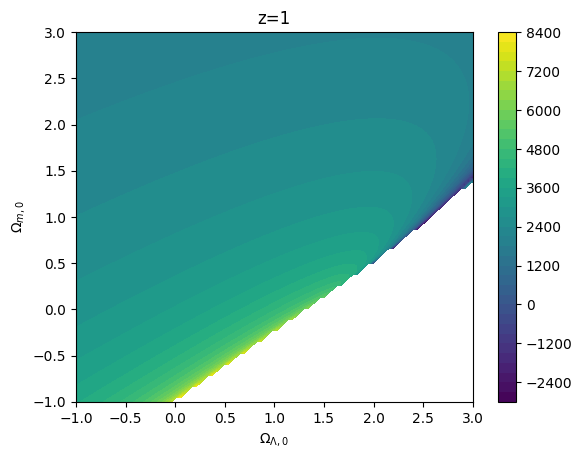

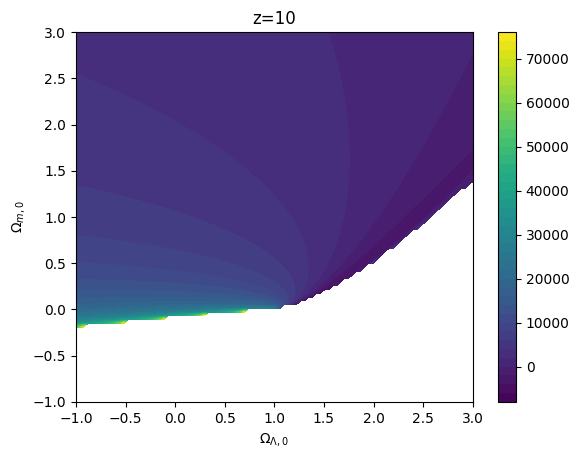

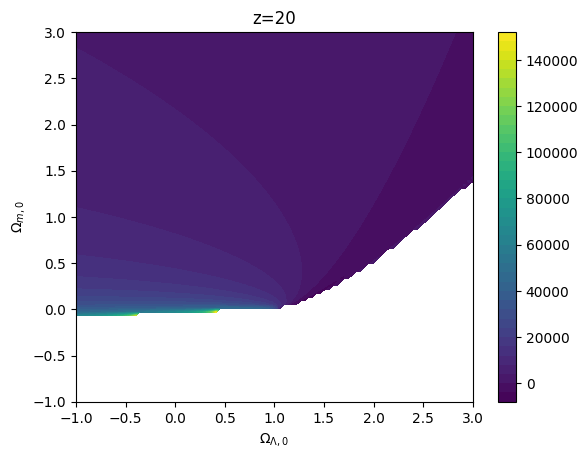

In [67]:

plt.contourf(x,y,fk3,levels=40)

plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=1')
plt.colorbar()
plt.show()


plt.contourf(x,y,fk1,levels=40)

plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=10')
plt.colorbar()
plt.show()

plt.contourf(x,y,fk2,levels=40)

plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=20')
plt.colorbar()
plt.show()
